In [1]:
# Let's import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score

import plotly.express as px

import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Let's load the dataset
data=pd.read_csv('/Users/soumyajain/Desktop/USL/Day 4/USL Case study/Country-data.csv')
data.head(2)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090


# Let's explore the dataset

In [3]:
data.shape

(167, 10)

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


<Axes: >

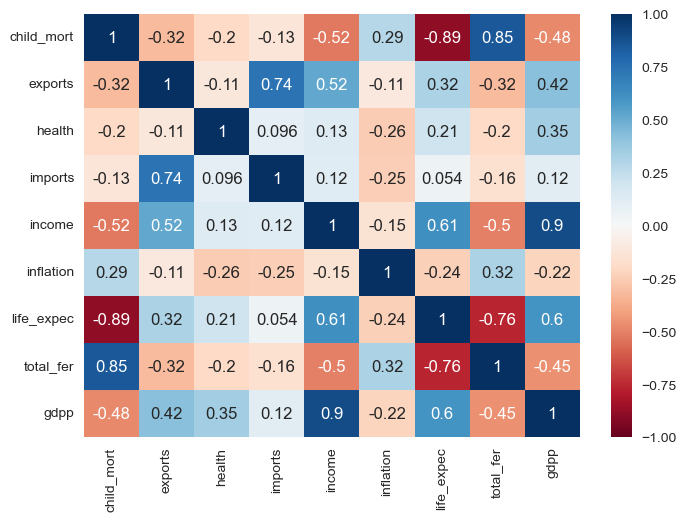

In [5]:
# Correlation Heatmap
sns.heatmap(data.corr(numeric_only=True), annot=True, vmin=-1, cmap='RdBu')

# Let's Visualize the Data

In [6]:
# Before we begin visualization let's convert country to index (as it's a redundant column)
data.set_index('country',inplace=True)

In [7]:
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


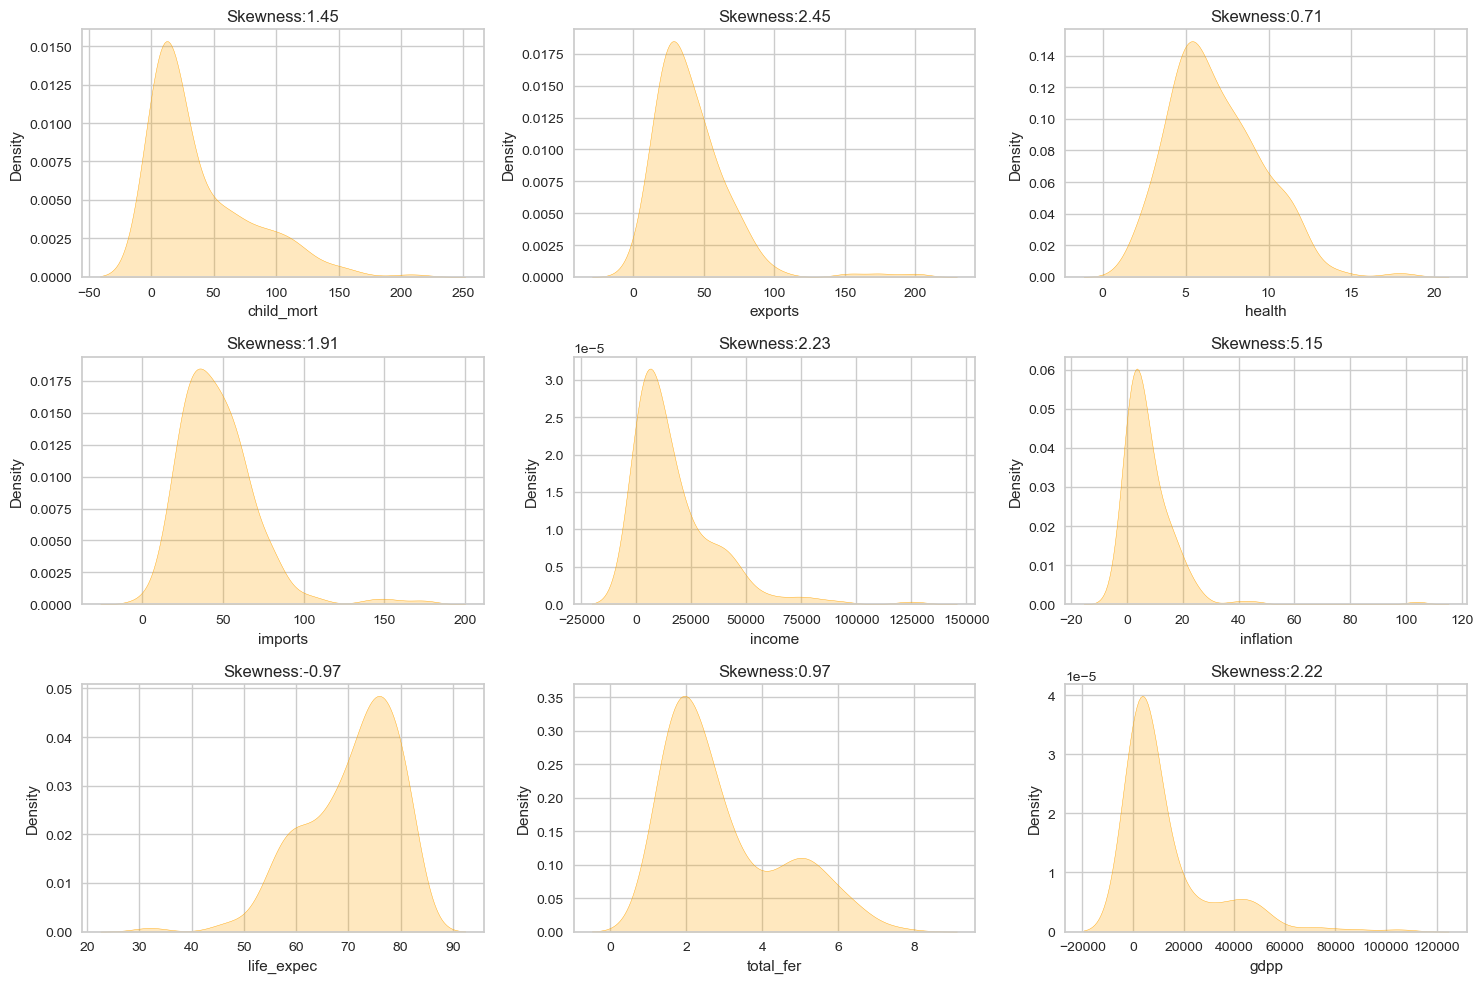

In [8]:
# Univariate Analysis

t=1
plt.figure(figsize=(15,10))
for i in data.columns:
    plt.subplot(3,3,t)
    sns.kdeplot(data=data,x=i,fill=True,color='orange')
    plt.title(f'Skewness:{round(data[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()

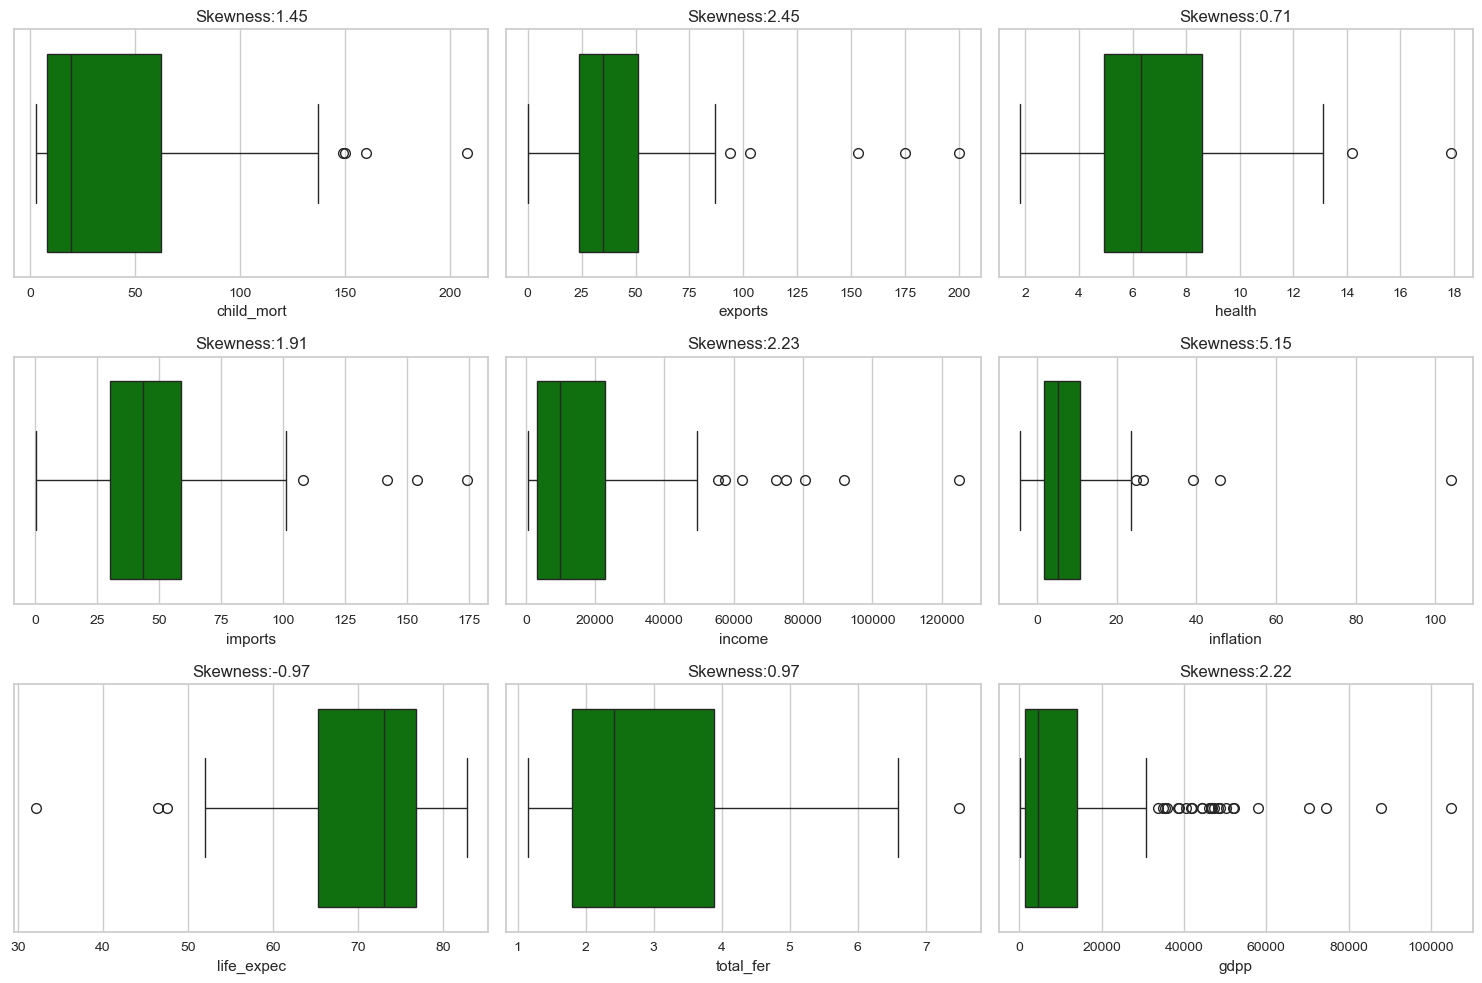

In [9]:
t=1
plt.figure(figsize=(15,10))
for i in data.columns:
    plt.subplot(3,3,t)
    sns.boxplot(data=data,x=i,fill=True,color='green')
    plt.title(f'Skewness:{round(data[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()

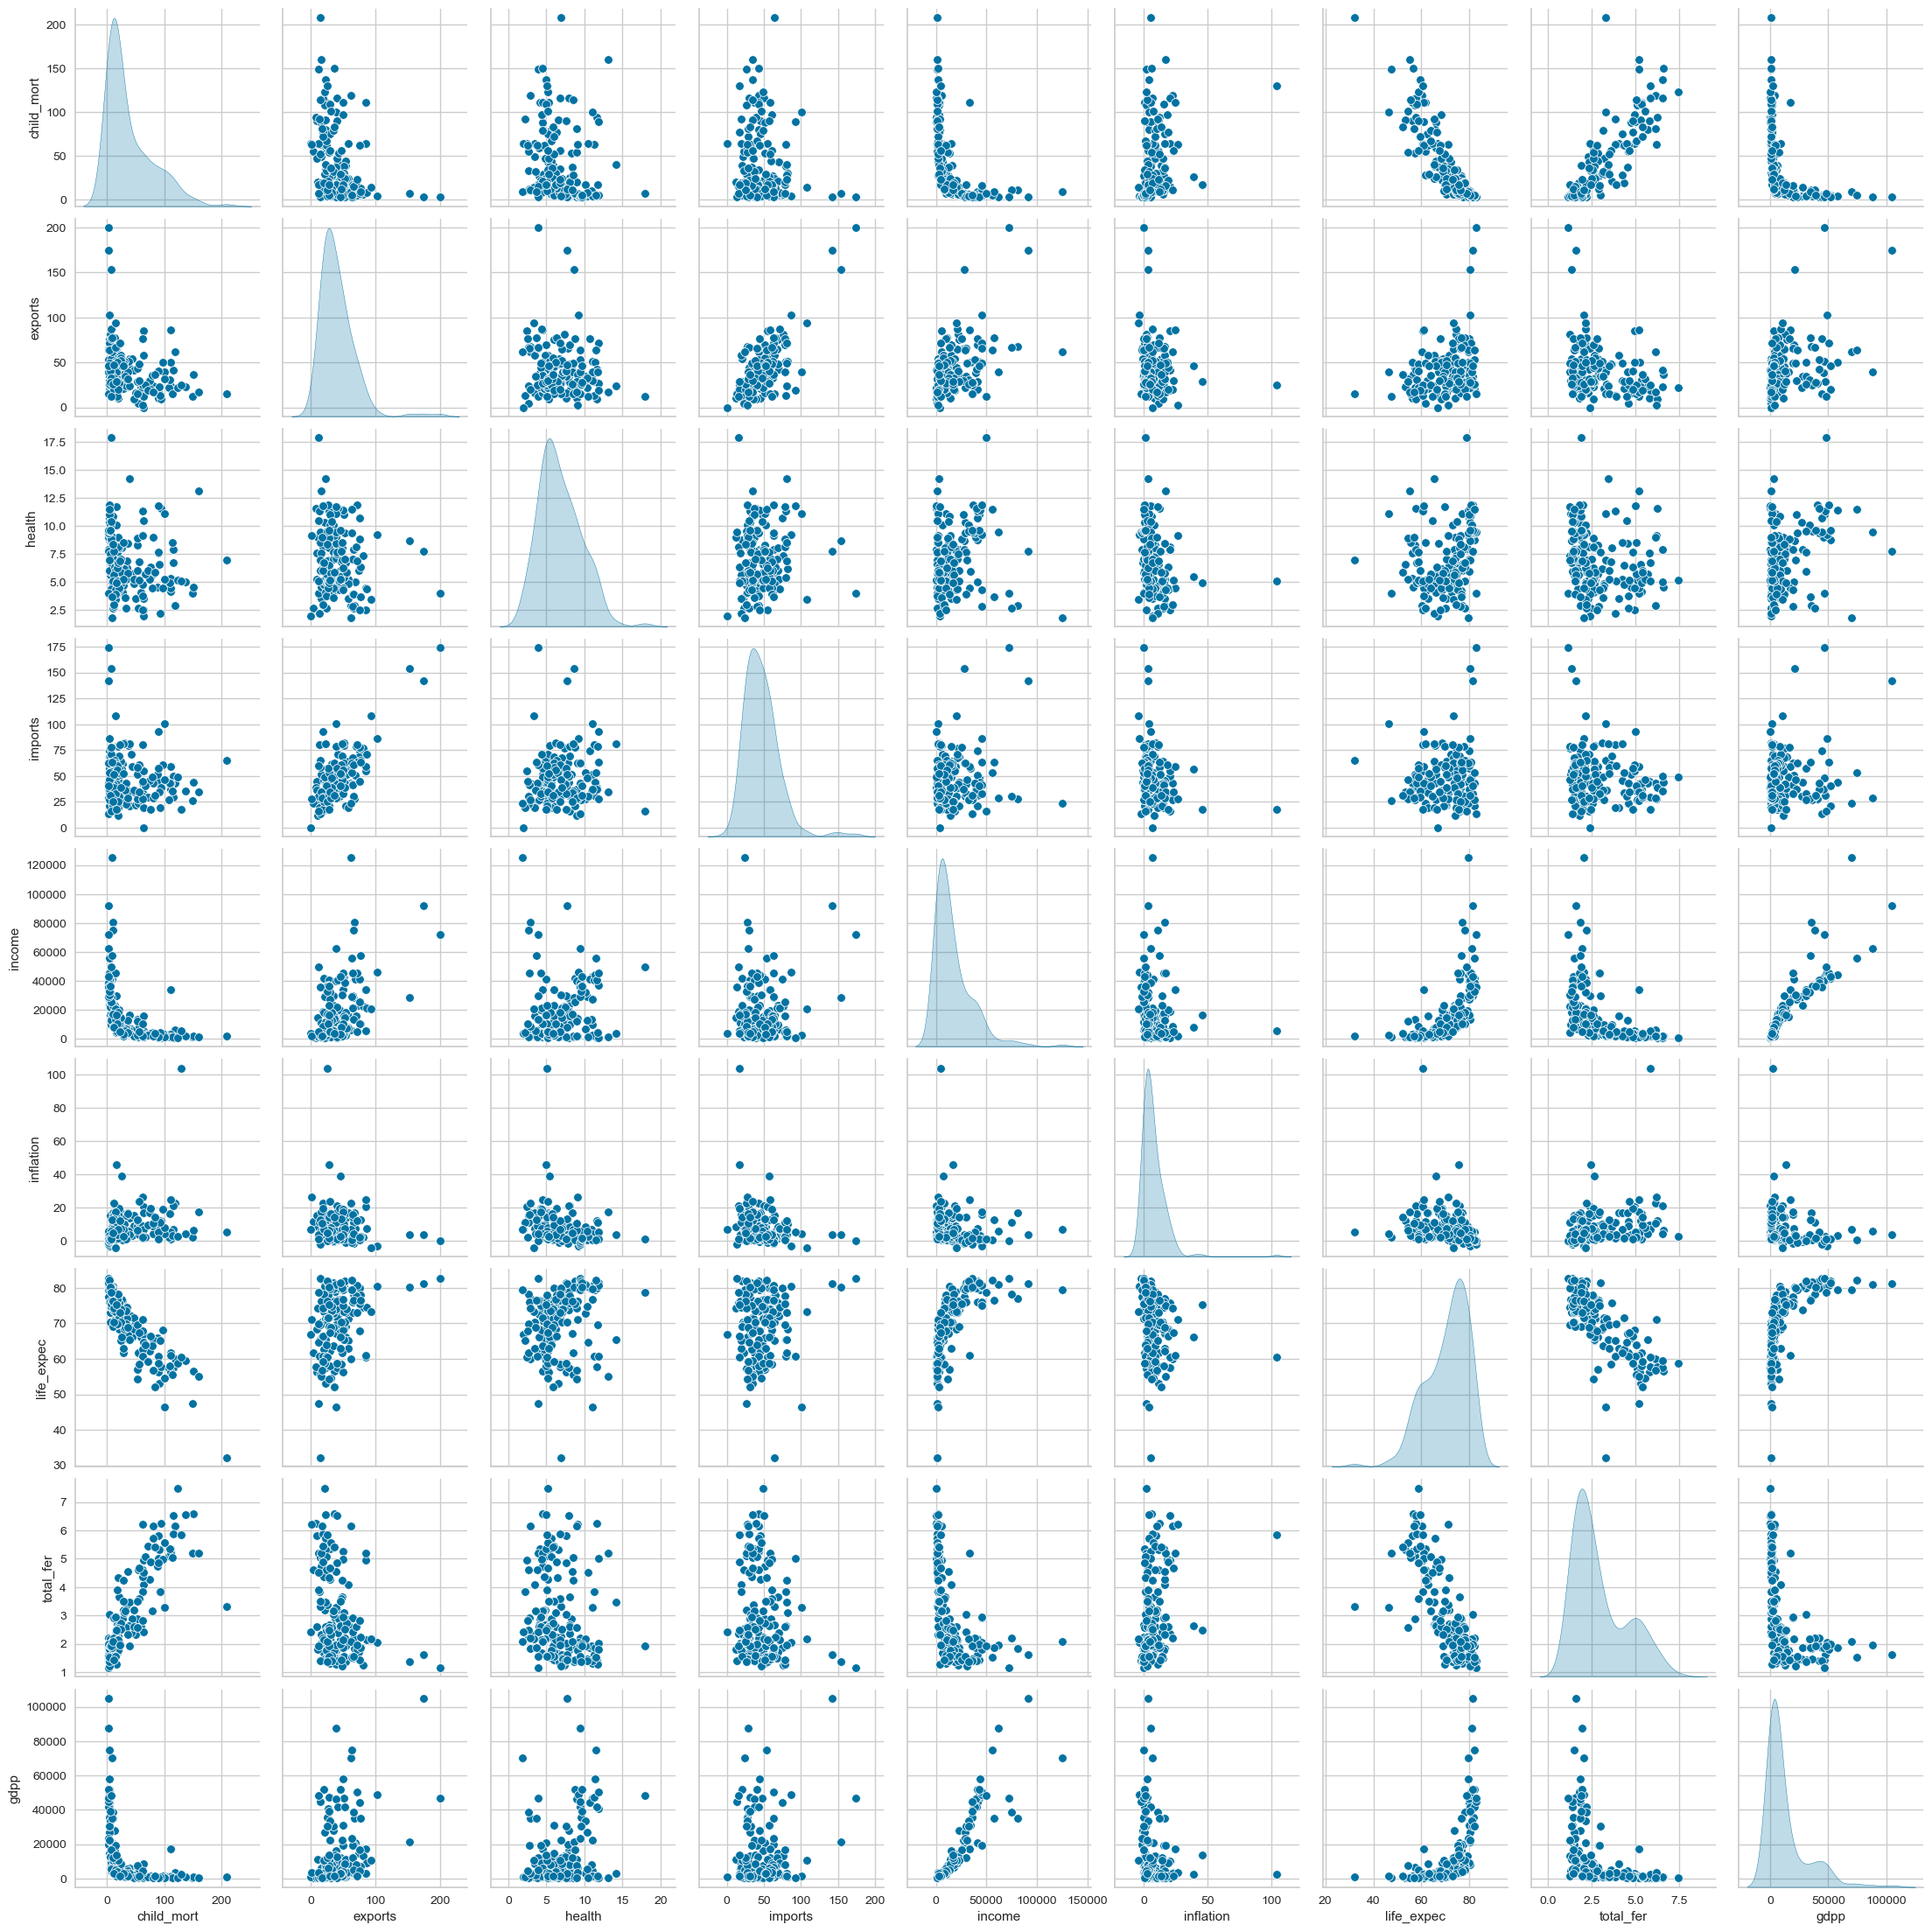

In [10]:
# Multivariate analysis

sns.pairplot(data, diag_kind='kde')
plt.show()


# Preprocessing

In [11]:
# Check for missing values
data.isnull().sum().sum()
# No missing values

np.int64(0)

In [12]:
# Lets treat the extreme outliers
# We will go with capping using IQR method
# In order to cap only the extreme values, we will keep whisker length= 2.5

for i in data.columns:
    q1,q3=data[i].quantile([0.25,0.75])
    iqr=q3-q1
    ul,ll=q3+iqr*2.5, q1-iqr*2.5
    data[i]=data[i].apply(lambda x: ul if x>ul else ll if x<ll else x)

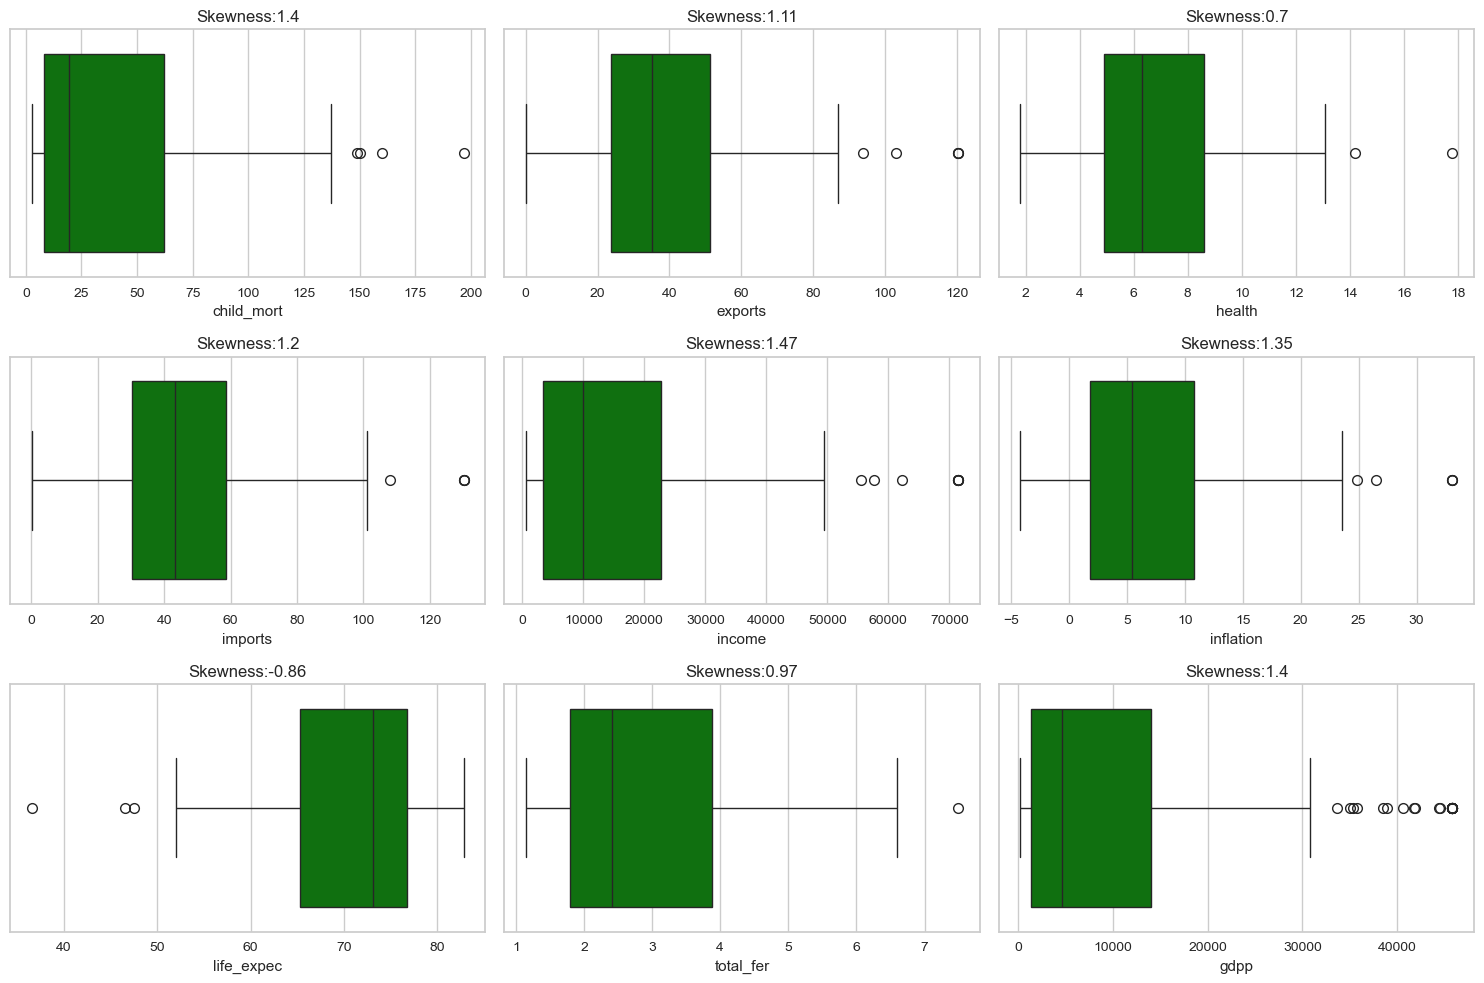

In [13]:
t=1
plt.figure(figsize=(15,10))
for i in data.columns:
    plt.subplot(3,3,t)
    sns.boxplot(data=data,x=i,fill=True,color='green')
    plt.title(f'Skewness:{round(data[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()

In [14]:
# Let's apply PCA on the data beforewe proceed with clustering. Just to have better visualization and for better clutering
# In PCA we need to pass standardized data; let's import the function from libraries


In [15]:
# Let's create an instance of scaling
scaler=StandardScaler()

# Lets also create an instance for PCA
pca=PCA(n_components=5,random_state=2)

# Let's create pipeline for above two processes
pipeline=Pipeline([('Scaler',scaler),
                  ('PCA',pca)])

In [16]:
pipeline.fit(data)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('PCA', PCA(n_components=5, random_state=2))])

In [17]:
pca.explained_variance_ratio_.cumsum()
# At n_components=5 we are able to explain ~95% variance, which is good enough. Thus, 9-Dimension data can be reduced to 5-Dimension data 

array([0.4758564 , 0.64300208, 0.77845398, 0.88018006, 0.94647697])

In [18]:
final_data=pipeline.transform(data)

In [19]:
# Transform returns the array. Let's convert it into a dataframe
final_data=pd.DataFrame(final_data,columns=['PC1','PC2','PC3','PC4','PC5'],index=data.index)
final_data.head(3)

,PC1,PC2,PC3,PC4,PC5
country,,,,,
Afghanistan,-3.043637,-0.201155,0.951322,0.793445,-0.006800
Albania,0.423415,-0.371463,0.171749,-1.353581,0.088623
Algeria,-0.404684,-0.440312,-1.636775,-0.573008,0.397119


# K-Means Clustering

In [20]:
# Identify the value of K

# K-Elbow Visualizer
kelbow=KElbowVisualizer(estimator=KMeans(random_state=2),k=10)

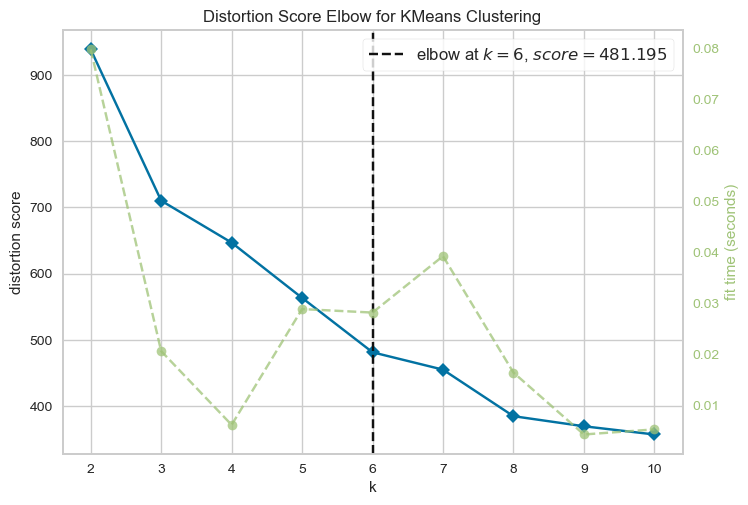

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
kelbow.fit(final_data)
kelbow.show()

Althogh the above plot marks the elbow at k=6, but we can see that is a significant drop in distortion score from k=2 to k=3. As we increase the number of clusters, it might become overfitted, so let's explore silhouette visualizer to identify the correct or more genralised value of K. 

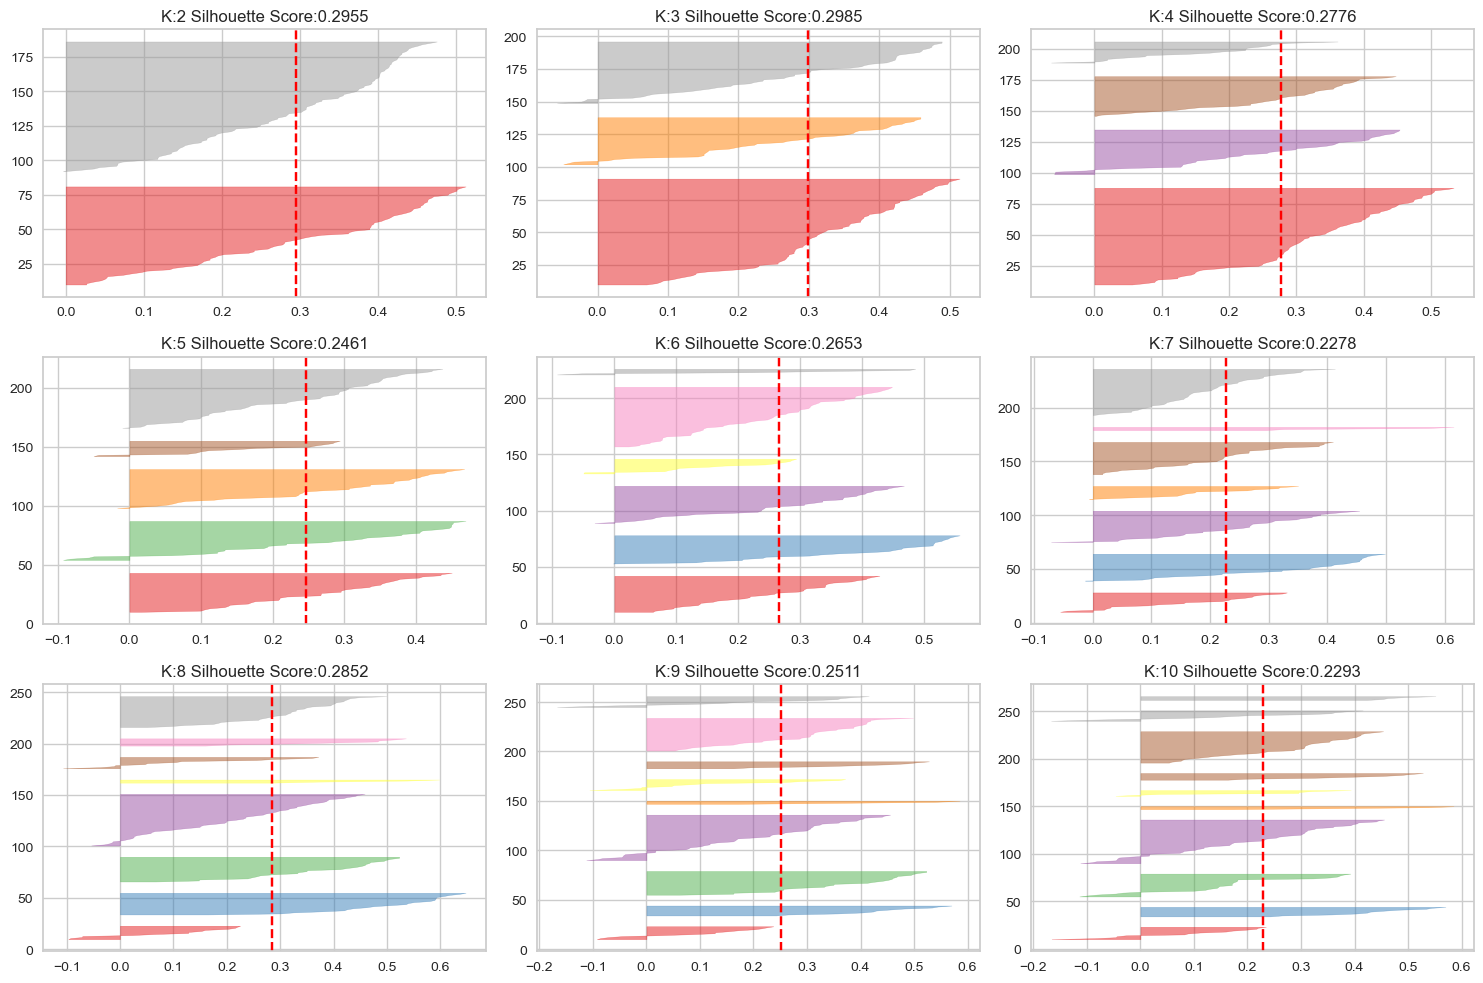

In [22]:
t=1
plt.figure(figsize=(15,10))
for i in range(2,11):
    plt.subplot(3,3,t)
    model = KMeans(n_clusters=i, random_state=2)
    sil_viz=SilhouetteVisualizer(model)
    sil_viz.fit(final_data)
    plt.title(f'K:{i} Silhouette Score:{round(sil_viz.silhouette_score_,4)}')
    t+=1
plt.tight_layout()
plt.show()

After analyzing Elbow plot and Silhouette visualizer, let's go with k=3. Althoigh there are a few data points that have been misclassified but we see no drop in the sillhouette score and there is good enough data in every cluster. Also, from KElbow plot significant drop in wcss/distortion was observed from k=2 to k=3. 

In [23]:
final_kmeans=KMeans(n_clusters=3,random_state=2)

In [24]:
labels=final_kmeans.fit_predict(final_data)

In [25]:
# Let's check the silhouette score
print('Silhouette Score;',silhouette_score(final_data,labels))

Silhouette Score; 0.29845782348296623


In [26]:
# Let's put these labels on PCA data 
final_data['Labels']=labels
final_data.head()

,PC1,PC2,PC3,PC4,PC5,Labels
country,,,,,,
Afghanistan,-3.043637,-0.201155,0.951322,0.793445,-0.006800,2
Albania,0.423415,-0.371463,0.171749,-1.353581,0.088623,0
Algeria,-0.404684,-0.440312,-1.636775,-0.573008,0.397119,0
Angola,-3.150063,1.425283,-1.784982,1.580071,0.142609,2
Antigua and Barbuda,1.145313,0.392985,0.151332,-0.823193,-0.370311,0


In [27]:
# Let's visualize the clusters
# In order to get the best visualization lets choose PC1 and PC2 as they have maximum variance

centroids=final_kmeans.cluster_centers_
centroids

array([[ 0.17875525,  0.05341484, -0.20504774, -0.75501774,  0.17891715],
       [ 2.84546398, -0.32884162,  0.1503381 ,  0.8430014 , -0.22073048],
       [-2.49875204,  0.16223172,  0.23440427,  0.6400084 , -0.13550372]])

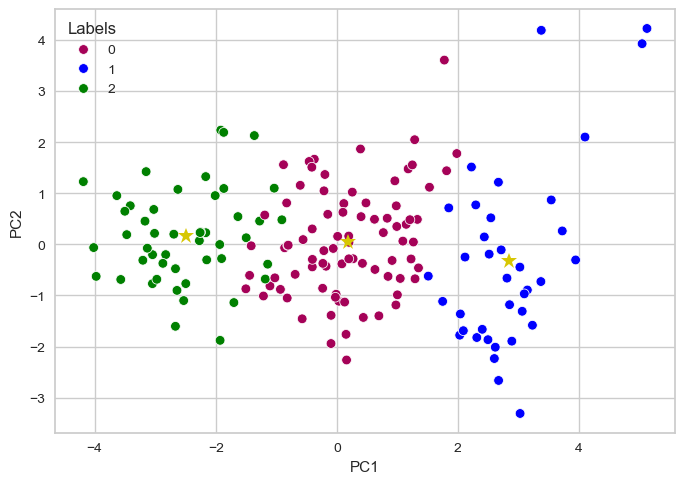

In [28]:
sns.scatterplot(data=final_data,x='PC1',y='PC2', palette=['m','blue','green'], hue='Labels')
for i in range(3):
    plt.plot(centroids[i][0],centroids[i][1],marker='*',ms=12,color='y')
plt.show()

## Business Interpretations

In [29]:
# To have business understanding, lets put labels on original data
data['Label']=labels
data.head(2)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Label
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,2
Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,0


In [30]:
data.groupby(by='Label').mean().T

Label,0,1,2
child_mort,21.508537,5.237838,92.131771
exports,40.797317,53.575000,28.546229
health,6.231951,8.780270,6.296458
imports,48.097561,49.129054,41.443040
income,12281.097561,42690.878378,3937.770833
inflation,7.474744,2.588432,10.438854
life_expec,72.875610,79.956757,59.438542
total_fer,2.311707,1.755676,4.953958
gdpp,6291.146341,36905.405405,1902.916667


After studying the above data we can conclude that countries assigned in cluster 2 can be called underdeveloped while cluster are developed. Countries belonging  to cluster 0 
are doing average in most factors but strugging in some economic factors like gdpp, income and health expenditure. Hence they can be called developing.




In [31]:
data['Label']=data['Label'].map({0:"Developing",1:"Developed", 2:"Underdeveloped"})

In [32]:
# Developed Countries
data[data['Label']=='Developed'].index

Index(['Australia', 'Austria', 'Bahamas', 'Bahrain', 'Belgium', 'Brunei',
       'Canada', 'Cyprus', 'Czech Republic', 'Denmark', 'Finland', 'France',
       'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Kuwait', 'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway',
       'Portugal', 'Qatar', 'Singapore', 'Slovak Republic', 'Slovenia',
       'South Korea', 'Spain', 'Sweden', 'Switzerland', 'United Arab Emirates',
       'United Kingdom', 'United States'],
      dtype='object', name='country')

In [33]:
# Developing Countries
data[data['Label']=='Developing'].index

Index(['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Azerbaijan', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cambodia',
       'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Fiji', 'Georgia', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'India',
       'Indonesia', 'Iran', 'Jamaica', 'Jordan', 'Kazakhstan',
       'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Libya', 'Lithuania',
       'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius',
       'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco',
       'Nepal', 'Oman', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland',
       'Romania', 'Russia', 'Samoa', 'Saudi Arabia', 'Serbia', 'Seychelles',
       'Solomon Islands', 'Sri Lanka', 'St. Vincent and the Grenadines',
       'Suriname', 'Tajikistan', '

In [34]:
# Underdeveloped Countries
data[data['Label']=='Underdeveloped'].index

Index(['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Cote d'Ivoire', 'Equatorial Guinea',
       'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau',
       'Haiti', 'Iraq', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia',
       'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Myanmar',
       'Namibia', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal',
       'Sierra Leone', 'South Africa', 'Sudan', 'Tanzania', 'Timor-Leste',
       'Togo', 'Uganda', 'Yemen', 'Zambia'],
      dtype='object', name='country')

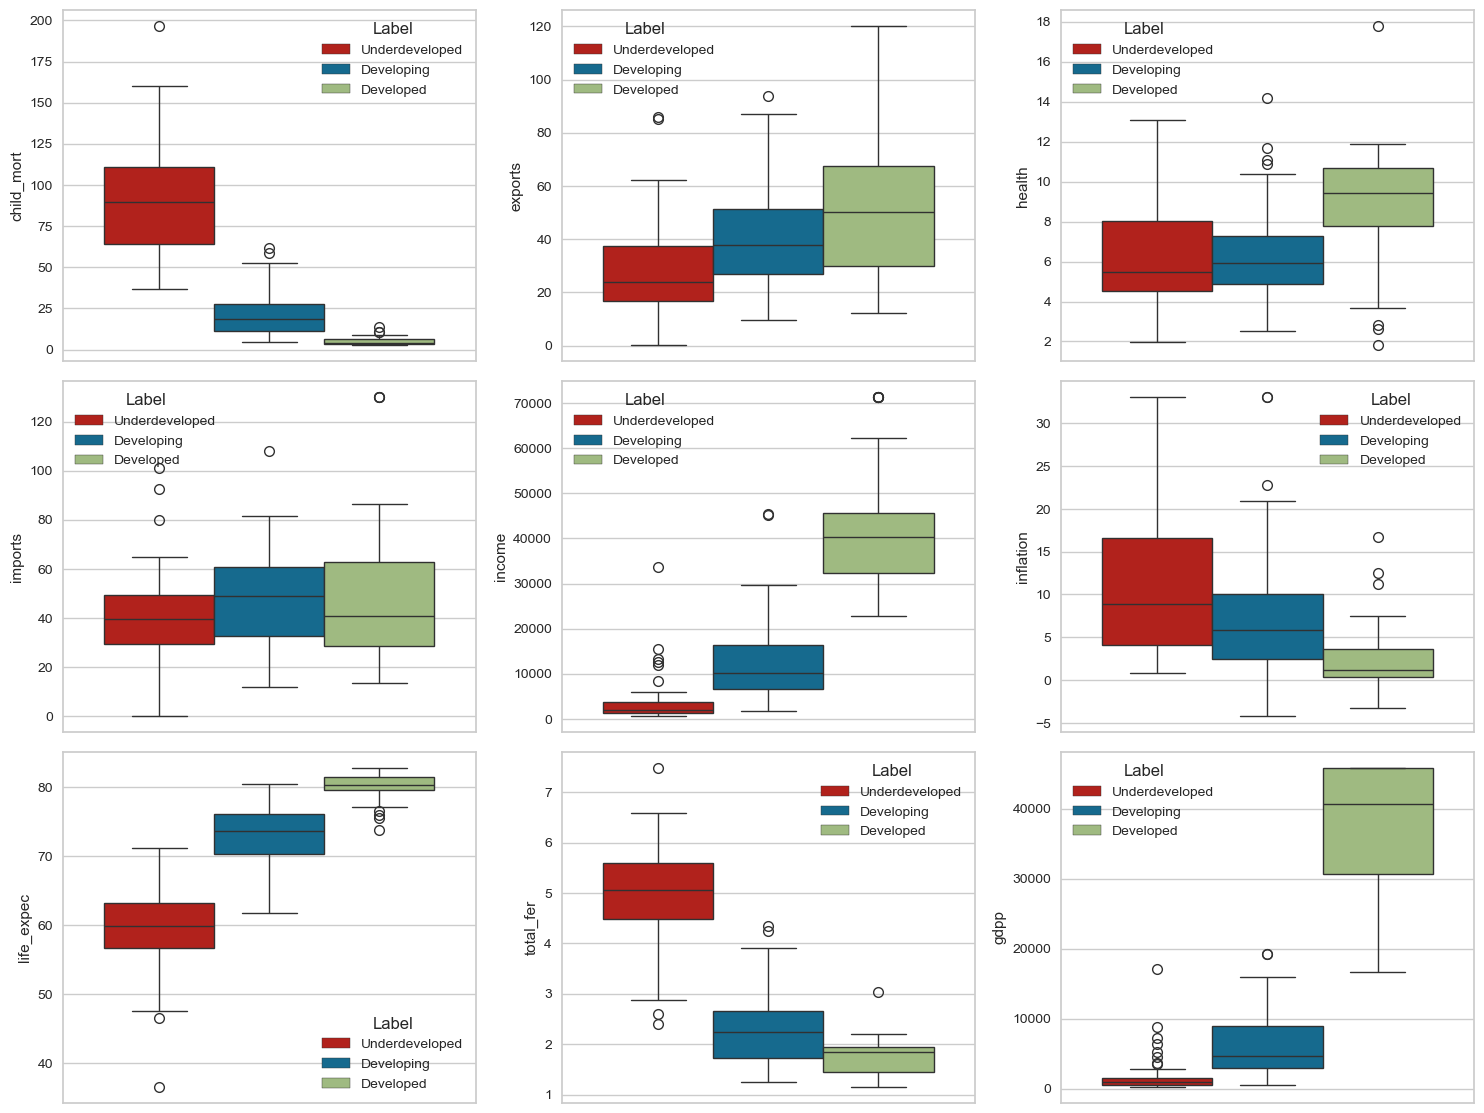

In [35]:
t=1
plt.figure(figsize=(15,15))
for i in data.columns:
    if i!='Label':
        plt.subplot(4,3,t)
        sns.boxplot(data=data,y=i,hue='Label',palette=['r','b','g'])
        t+=1
plt.tight_layout()
plt.show()

In [37]:
# World Map
px.choropleth(data_frame=data,locationmode='country names', locations=data.index,color='Label',
              color_continuous_scale={'Underdeveloped':'red',
                                      'Developing':'blue',
                                      'Developed':'green'})